In [1]:
import emcee
from scipy.optimize import minimize
import corner
import ptemcee
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from emukit.core import ParameterSpace, ContinuousParameter
from GPy.models import MultioutputGP
from GPy import likelihoods
from emukit.model_wrappers import GPyMultiOutputWrapper
from GPy.kern import RBF

### 1-dimensional input, 2-dimensional outputs

Define simple test functions: sine and cosine

In [2]:
def f(X):
    y1 = np.sin(X) #+ np.random.normal(size=1,loc=0,scale=0.1)
    y2 = np.cos(X) #+ np.random.normal(size=1,loc=0,scale=0.1)
    return [y1,y2]

Generate initial design points

In [3]:
from emukit.core.initial_designs import RandomDesign

parameter_space = ParameterSpace([ContinuousParameter('x', 0, 1)])
design = RandomDesign(parameter_space)
num_data_points = 2
X = design.get_samples(num_data_points)
X = 8 * X - 4 # convert to [-4,4]

In [4]:
X

array([[-0.46236102],
       [ 2.07767117]])

In [5]:
Y = f(X)

In [6]:
kernel1 = RBF(input_dim=1)
kernel2 = RBF(input_dim=1)
model_gpy = MultioutputGP([X,X],Y,
                          likelihood_list=[likelihoods.Gaussian(),likelihoods.Gaussian()],
                          kernel_list=[kernel1,kernel2])
model_emukit = GPyMultiOutputWrapper(model_gpy, n_outputs=2, n_optimization_restarts=10)
model_emukit.optimize()

Optimization restart 1/10, f = 4.288113028875871
Optimization restart 2/10, f = 4.288112940136962
Optimization restart 3/10, f = 4.2881130174800735
Optimization restart 4/10, f = 4.288113090585837
Optimization restart 5/10, f = 4.288112926727507
Optimization restart 6/10, f = 4.2881129308554975
Optimization restart 7/10, f = 4.288112906709716
Optimization restart 8/10, f = 4.2881129449578115
Optimization restart 9/10, f = 4.288113159456422
Optimization restart 10/10, f = 4.288112942691905


In [7]:
from emukit.experimental_design.acquisitions.contour_MultiObs import contourWeightedEI

Set target: true parameter = 0.5

In [8]:
a_list = [np.sin(0.5), np.cos(0.5)]
alpha_list = [2, 2]
w_list = [0.5, 0.5]

In [9]:
contour_MD = contourWeightedEI(modelwrapper = model_emukit, a_list = a_list, alpha_list = alpha_list, w_list = w_list)

In [10]:
from emukit.experimental_design import ExperimentalDesignLoop
expdesign_loop = ExperimentalDesignLoop(model = model_emukit,
                                         space = parameter_space,
                                         acquisition = contour_MD,
                                         batch_size = 1)

In [12]:
from emukit.core.optimization import GradientAcquisitionOptimizer



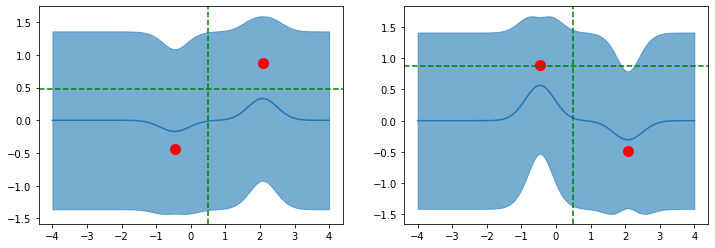

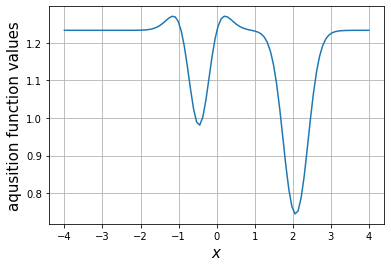

[[0.22019031]]
Optimization restart 1/10, f = 5.2158533852439275
Optimization restart 2/10, f = 5.215853411842636
Optimization restart 3/10, f = 5.217227400853115
Optimization restart 4/10, f = 5.217227375407584
Optimization restart 5/10, f = 5.215853395742238
Optimization restart 6/10, f = 5.215853436445812
Optimization restart 7/10, f = 5.217227402115862
Optimization restart 8/10, f = 5.217227403401934
Optimization restart 9/10, f = 5.217227379908851
Optimization restart 10/10, f = 5.215853561567485


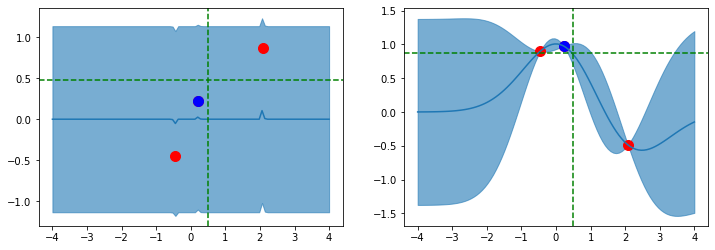

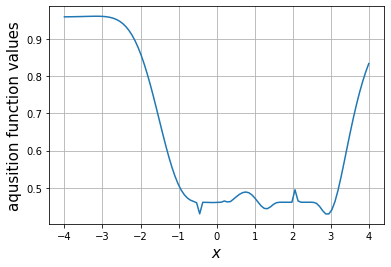

[[-3.16192767]]
Optimization restart 1/10, f = 7.045950268684879
Optimization restart 2/10, f = 7.045950103323882
Optimization restart 3/10, f = 7.045950099151137
Optimization restart 4/10, f = 7.045950135950521
Optimization restart 5/10, f = 7.04595010691779
Optimization restart 6/10, f = 7.045950311985649
Optimization restart 7/10, f = 7.045950299671655
Optimization restart 8/10, f = 7.045950110344945
Optimization restart 9/10, f = 8.018652845970122
Optimization restart 10/10, f = 7.0459501134678995


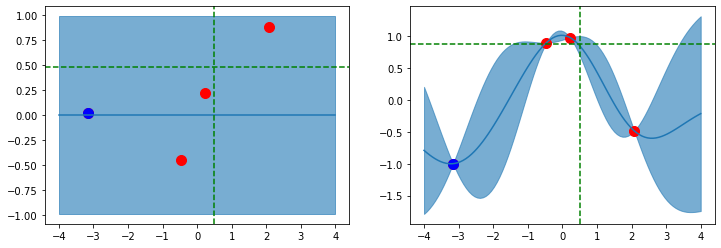

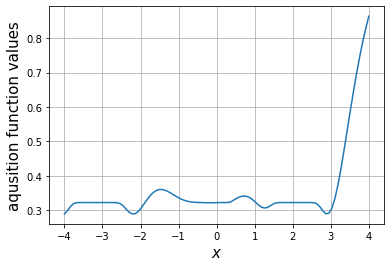

[[4.]]
Optimization restart 1/10, f = 9.051999584961582
Optimization restart 2/10, f = 9.051999609090768
Optimization restart 3/10, f = 9.051999551807931
Optimization restart 4/10, f = 9.051999553530353
Optimization restart 5/10, f = 9.05199954640246
Optimization restart 6/10, f = 9.05199958531147
Optimization restart 7/10, f = 9.052000242040357
Optimization restart 8/10, f = 9.051999524773962
Optimization restart 9/10, f = 9.051999570419389
Optimization restart 10/10, f = 9.051999542564758


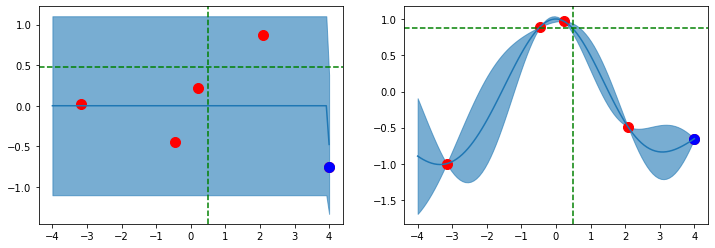

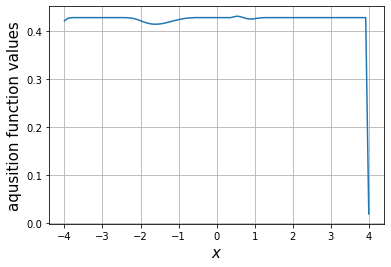

[[0.54103683]]
Optimization restart 1/10, f = 7.179502700146265
Optimization restart 2/10, f = 7.17950267508275
Optimization restart 3/10, f = 5.014898839709955
Optimization restart 4/10, f = 5.014898734208002
Optimization restart 5/10, f = 5.0148987634591755
Optimization restart 6/10, f = 7.179502500125892
Optimization restart 7/10, f = 5.014898740859996
Optimization restart 8/10, f = 5.014898904370547
Optimization restart 9/10, f = 5.014898756327598
Optimization restart 10/10, f = 5.0148988682232165


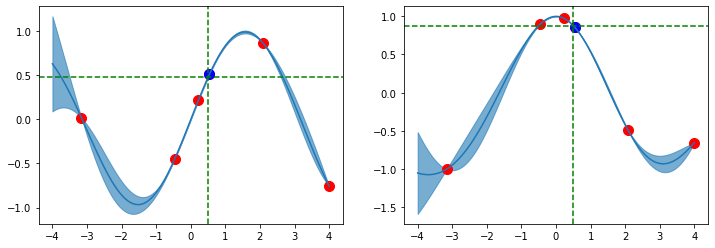

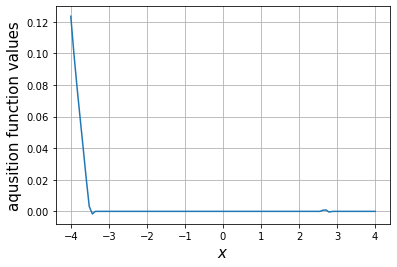

[[-4.]]
Optimization restart 1/10, f = 5.056475769353405
Optimization restart 2/10, f = 5.056475762690345
Optimization restart 3/10, f = 5.0564757659311885
Optimization restart 4/10, f = 5.05647579186768
Optimization restart 5/10, f = 5.056475767606596
Optimization restart 6/10, f = 5.056475766044896
Optimization restart 7/10, f = 5.056475780026137
Optimization restart 8/10, f = 5.0564757983461615
Optimization restart 9/10, f = 5.056475763450891
Optimization restart 10/10, f = 5.056475782688992


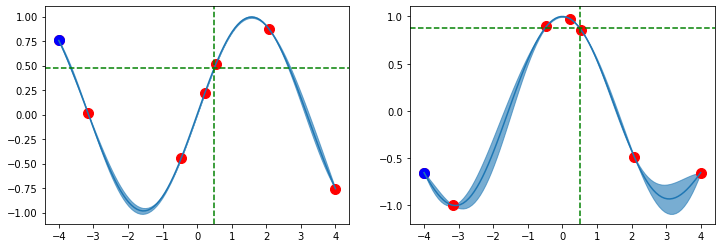

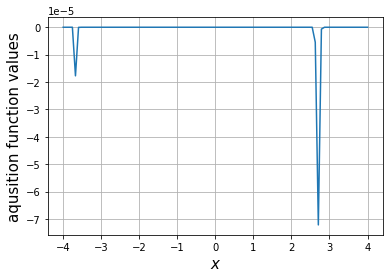

[[2.66302834]]
Optimization restart 1/10, f = -0.24627701489119858
Optimization restart 2/10, f = -0.24627701303622018
Optimization restart 3/10, f = -0.24627701429223237
Optimization restart 4/10, f = -0.24627701397264445
Optimization restart 5/10, f = -0.2462770137314081
Optimization restart 6/10, f = -0.24627701396795842
Optimization restart 7/10, f = -0.2462770108137775
Optimization restart 8/10, f = 6.980037803141007
Optimization restart 9/10, f = -0.24627692829932357
Optimization restart 10/10, f = -0.2462769942215246


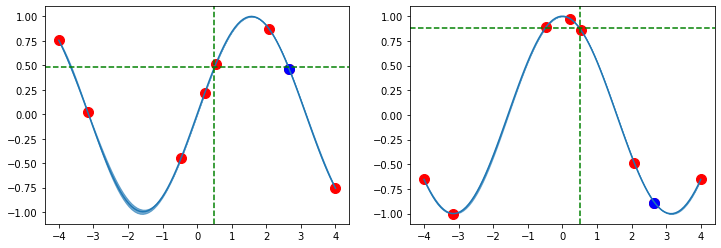

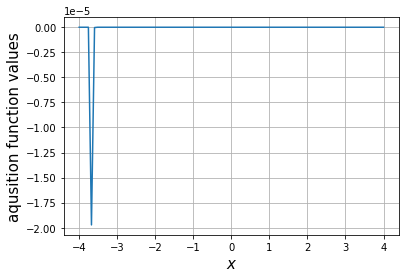

[[-3.64775672]]
Optimization restart 1/10, f = -8.356452310310555
Optimization restart 2/10, f = -8.356453277179522
Optimization restart 3/10, f = -8.356453292276473
Optimization restart 4/10, f = -8.356453319687805
Optimization restart 5/10, f = -8.356453110964683
Optimization restart 6/10, f = -8.356453311883168
Optimization restart 7/10, f = -8.35645322869696
Optimization restart 8/10, f = -8.356453243594128
Optimization restart 9/10, f = 3.3608678134346484
Optimization restart 10/10, f = -8.356453315887226


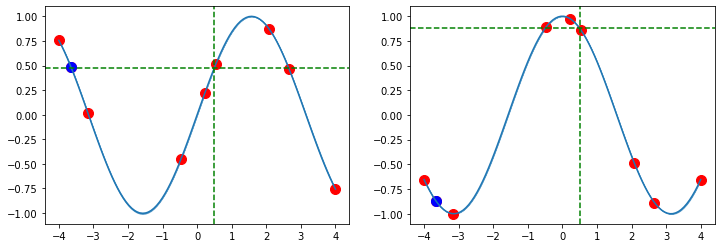

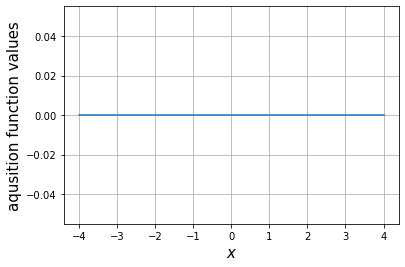

[[-3.64027546]]
Optimization restart 1/10, f = -24.241716826858948
Optimization restart 2/10, f = -24.241716812249734
Optimization restart 3/10, f = -24.241716738777917
Optimization restart 4/10, f = -24.241716817765628
Optimization restart 5/10, f = -24.241640095320207
Optimization restart 6/10, f = -24.241715837026113
Optimization restart 7/10, f = -24.24171689742508
Optimization restart 8/10, f = -24.241716495011396
Optimization restart 9/10, f = -24.241716980989416
Optimization restart 10/10, f = -24.24171690564002


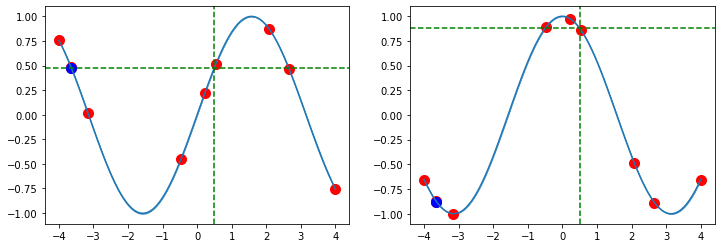

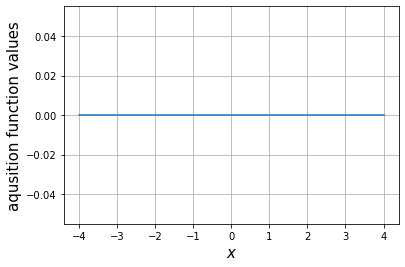

[[-3.64007942]]
Optimization restart 1/10, f = -40.417434288315356
Optimization restart 2/10, f = -40.41741446562953
Optimization restart 3/10, f = -40.41743360923057
Optimization restart 4/10, f = -40.41743430462312
Optimization restart 5/10, f = -40.417434162756
Optimization restart 6/10, f = -40.41743425773464
Optimization restart 7/10, f = -40.417434336999726
Optimization restart 8/10, f = -40.417418827409676
Optimization restart 9/10, f = -40.417434292872684
Optimization restart 10/10, f = -40.417434332714045


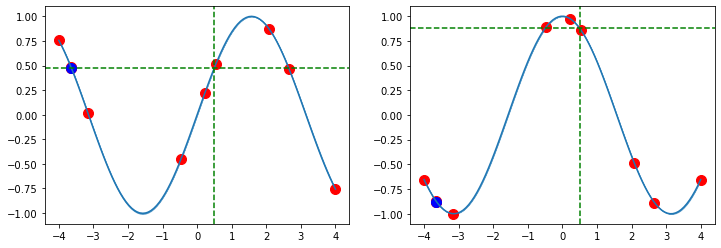

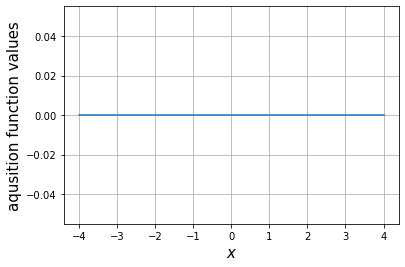

[[0.50507605]]
Optimization restart 1/10, f = -56.41272326720846
Optimization restart 2/10, f = -56.41272407167193
Optimization restart 3/10, f = -56.41272439422029
Optimization restart 4/10, f = -56.41248004436679
Optimization restart 5/10, f = -56.41272444545348
Optimization restart 6/10, f = -56.4127244331392
Optimization restart 7/10, f = -56.41272443841862
Optimization restart 8/10, f = -56.41272427546305
Optimization restart 9/10, f = -56.41267809358021
Optimization restart 10/10, f = -56.41272450133091


In [14]:
# with figures
max_iterations = 10
x_plot = np.linspace(-4, 4,100).reshape(-1,1)

for i in range(0,max_iterations):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    
    # first observable
    obsNo = 0
    new_column = [[obsNo]]*len(x_plot) # predict for ith emulator
    pred_temp = model_emukit.predict(np.append(x_plot,new_column,axis=1))
    m_vec = pred_temp[0] # vector of predictive means
    s2_vec = pred_temp[1] # vector of predictive variances
    
    x1_temp = model_emukit.X[model_emukit.X[:,1]==obsNo,0].reshape(-1,1)
    y1_temp = model_emukit.Y[obsNo*len(x1_temp):(obsNo+1)*len(x1_temp)]
    
    ax1.plot(x1_temp, y1_temp, "ro", markersize=10, label="Observations")
    if i > 0 :
        ax1.plot(xnew, f(xnew)[obsNo], "bo", markersize=10, label="Observations")
    ax1.plot(x_plot, m_vec, "C0", label="Model")
    ax1.fill_between(x_plot[:, 0],
                 m_vec[:, 0] + 1.96 * np.sqrt(s2_vec)[:, 0],
                 m_vec[:, 0] - 1.96 * np.sqrt(s2_vec)[:, 0], color="C0", alpha=0.6, label=r'1.96$\sigma$')
    ax1.axhline(y=a_list[obsNo], color='g', linestyle='--')
    ax1.axvline(x=0.5, color='g', linestyle='--')
    
    # second observable
    obsNo = 1
    new_column = [[obsNo]]*len(x_plot) # predict for ith emulator
    pred_temp = model_emukit.predict(np.append(x_plot,new_column,axis=1))
    m_vec = pred_temp[0] # vector of predictive means
    s2_vec = pred_temp[1] # vector of predictive variances
    
    x2_temp = model_emukit.X[model_emukit.X[:,1]==obsNo,0].reshape(-1,1)
    y2_temp = model_emukit.Y[obsNo*len(x1_temp):(obsNo+1)*len(x1_temp)]
    
    ax2.plot(x2_temp, y2_temp, "ro", markersize=10, label="Observations")
    if i > 0 :
        ax2.plot(xnew, f(xnew)[obsNo], "bo", markersize=10, label="Observations")
    ax2.plot(x_plot, m_vec, "C0", label="Model")
    ax2.fill_between(x_plot[:, 0],
                 m_vec[:, 0] + 1.96 * np.sqrt(s2_vec)[:, 0],
                 m_vec[:, 0] - 1.96 * np.sqrt(s2_vec)[:, 0], color="C0", alpha=0.6, label=r'1.96$\sigma$')
    ax2.axhline(y=a_list[obsNo], color='g', linestyle='--')
    ax2.axvline(x=0.5, color='g', linestyle='--')
    plt.show()
    
    # plot acquisition
    plt.figure(figsize=(6,4))
    aqu_values= contour_MD.evaluate(x=x_plot)
    plt.plot(x_plot, aqu_values)
    plt.xlabel(r"$x$", fontsize=15)
    plt.ylabel('aqusition function values', fontsize=15)
    plt.grid(True)
    plt.show()
    
    # Compute next point
    optimizer = GradientAcquisitionOptimizer(ParameterSpace([ContinuousParameter('x', -4, 4)]))
    xnew, _ = optimizer.optimize(contour_MD)
    #xnew = expdesign_loop.get_next_points(None) # what should be the input here for the "results"?
    print(xnew)
    X = np.append(X,xnew).reshape(-1,1)
    y1 = np.append(Y[0],f(xnew)[0]).reshape(-1,1)
    y2 = np.append(Y[1],f(xnew)[1]).reshape(-1,1)
    Y = [y1,y2]
    model_gpy = MultioutputGP([X,X],Y,
                          likelihood_list=[likelihoods.Gaussian(),likelihoods.Gaussian()],
                          kernel_list=[kernel1,kernel2])
    model_emukit = GPyMultiOutputWrapper(model_gpy, n_outputs=2, n_optimization_restarts=10)
    model_emukit.optimize()
    contour_MD = contourWeightedEI(modelwrapper = model_emukit, a_list = a_list, alpha_list = alpha_list, w_list = w_list)
    #expdesign_loop = ExperimentalDesignLoop(model = model_emukit,
    #                                     space = parameter_space,
    #                                     acquisition = contour_MD,
    #                                     batch_size = 1)
    

#### Issues to solve:
1. xnew = expdesign_loop.get_next_points(None): what should be the input parameters?
2. The acquisition plots do not look correct?

In [12]:
from emukit.core.loop import OuterLoop
help(OuterLoop.get_next_points)

Help on function get_next_points in module emukit.core.loop.outer_loop:

get_next_points(self, results: List[emukit.core.loop.user_function_result.UserFunctionResult], context: dict = {}) -> numpy.ndarray
    This method is used when the user doesn't want Emukit to evaluate the function of interest but rather just wants
    the input locations to evaluate the function at. This method calculates the new input locations.
    
    :param results: Function results since last loop step
    :param context: A dictionary of fixed parameters, identical to the context used in
                    self.run_loop()
    :return: Next batch of points to run

